In [1]:
%load_ext jupyter_black

In [75]:
import pandas as pd
import xarray as xr
import eurostat
import matplotlib.pyplot as plt
import pycountry

plt.style.use("ggplot")

In [4]:
dataset_code = "nrg_ind_urtd"

# Download csv data

In [11]:
df_dataset = eurostat.get_toc_df()
df_dataset.head()

,title,code,type,last update of data,last table structure change,data start,data end
0,Gross weight of goods transported to/from main...,MAR_GO_AM_SE,dataset,2010-02-26T23:00:00+0100,2023-07-27T23:00:00+0200,1997,2022
1,Gross weight of goods transported to/from main...,MAR_GO_AM_SI,dataset,2023-08-24T23:00:00+0200,2023-08-24T23:00:00+0200,2001,2022
2,Gross weight of goods transported to/from main...,MAR_GO_AM_TR,dataset,2011-04-11T23:00:00+0200,2023-07-27T23:00:00+0200,2008,2022
3,Gross weight of goods transported to/from main...,MAR_GO_AM_UK,dataset,2010-04-22T11:00:00+0200,2023-11-22T11:00:00+0100,2000,2019
4,Gross weight of goods transported to/from main...,MAR_GO_QM,dataset,2024-03-18T23:00:00+0100,2024-03-05T23:00:00+0100,1997-Q1,2023-Q4


In [13]:
parameters = eurostat.get_pars(dataset_code)
parameters

['freq', 'siec', 'nrg_bal', 'unit', 'geo']

In [14]:
for parameter in parameters:
    print(parameter)
    values = eurostat.get_par_values(dataset_code, parameter)
    print(values)

freq
['A']
siec
['TOTAL', 'RA000', 'R5200', 'R5250S', 'R5251S', 'R5252S', 'R5253S', 'R5254S', 'R5255S', 'R5256S', 'R5257S', 'R5258S', 'R5259S', 'R5260S', 'R5261S', 'R5262S', 'R5263S', 'R5264S', 'R5265S', 'R5266S', 'R5267S', 'R5268S', 'R5269S', 'R5270S', 'R5271S', 'R5272S', 'R5273S', 'R5274S', 'R5275S', 'R5276S', 'R5277S', 'R5278S', 'R5279S', 'R5300', 'R5300B', 'E7000', 'E7100', 'E7200', 'RHYD', 'RSYNF']
nrg_bal
['FC_TRA_E_RED', 'FC_TRA_ROAD_E_RED', 'FC_TRA_RAIL_E_RED', 'FC_TRA_OTH_E_RED', 'NRG_MNBRFT_E', 'GFC_TRA_E_NMULTI', 'GFC_TRA_E_MULTI', 'LIM_TT', 'BIOFCON_LIM_TRA', 'BIOF_FS_SHR', 'ST_MS_TRA', 'BIOG_G_SHR', 'BIOG_G_TRA', 'BIOG_G_ADJSHR']
unit
['KTOE', 'TJ_GCV', 'PC']
geo
['EU27_2020', 'EA20', 'BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'EL', 'ES', 'FR', 'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT', 'RO', 'SI', 'SK', 'FI', 'SE', 'IS', 'NO', 'UK', 'BA', 'ME', 'MD', 'MK', 'AL', 'RS', 'TR', 'XK', 'GE']


In [15]:
dic = eurostat.get_dic(dataset_code)
dic

[('freq',
  'Time frequency',
  'This code list contains the periodicity that refers to the frequency.'),
 ('siec',
  'Standard international energy product classification (SIEC)',
  'This code list contains the energy products according to the Standard International Energy Product Classification (SIEC) which has been developped as part of the International Recommendations for Energy Statistics (IRES) adopted by the UNSD.'),
 ('nrg_bal',
  'Energy balance',
  'This code list refers to the flows used for the energy balances.'),
 ('unit', 'Unit of measure', None),
 ('geo',
  'Geopolitical entity (reporting)',
  'This code list defines the reporting geopolitical entities.')]

In [16]:
dict_siec = eurostat.get_dic(dataset_code, "siec", frmt="dict")
dict_nrg = eurostat.get_dic(dataset_code, "nrg_bal", frmt="dict")

In [17]:
dict_siec

{'TOTAL': 'Total',
 'CF': 'Combustible fuels',
 'CF_R': 'Combustible fuels - renewable',
 'CF_NR': 'Combustible fuels - non-renewable',
 'CF_NR_OTH': 'Combustible fuels - non-renewable - other',
 'FF': 'Fossil fuels',
 'SFF_P1000': 'Solid fossil fuels and peat',
 'SFF_P1000_S2000': 'Solid fossil fuels, peat, peat products, oil shale and oil sands',
 'C0000': 'Coal and manufactured gases',
 'C0000X0350-0370': 'Solid fossil fuels',
 'C0100': 'Hard coal',
 'C0110': 'Anthracite',
 'C0120': 'Bituminous coal',
 'C0121': 'Coking coal',
 'C0129': 'Other bituminous coal',
 'C0200': 'Brown coal',
 'C0210': 'Sub-bituminous coal',
 'C0220': 'Lignite',
 'C0300': 'Coal products',
 'C0310': 'Coal coke',
 'C0311': 'Coke oven coke',
 'C0312': 'Gas coke',
 'C0313': 'Coke breeze',
 'C0314': 'Semi cokes',
 'C0320': 'Patent fuel',
 'C0330': 'Brown coal briquettes',
 'C0340': 'Coal tar',
 'C0350-0370': 'Manufactured gases',
 'C0350': 'Coke oven gas',
 'C0360': 'Gas works gas',
 'C0370': 'Recovered gases',
 

In [18]:
df = eurostat.get_data_df(dataset_code)
df.head()

,freq,siec,nrg_bal,unit,geo\TIME_PERIOD,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,E7000,NRG_MNBRFT_E,KTOE,AL,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,E7000,NRG_MNBRFT_E,KTOE,AT,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,E7000,NRG_MNBRFT_E,KTOE,BA,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,A,E7000,NRG_MNBRFT_E,KTOE,BE,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,E7000,NRG_MNBRFT_E,KTOE,BG,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df["siec_name"] = df.siec.replace(dict_siec)
df["nrg_bal_name"] = df.nrg_bal.replace(dict_nrg)
df = df.rename(columns={"geo\TIME_PERIOD": "geo"})

In [22]:
df = df[
    [
        "freq",
        "siec",
        "siec_name",
        "nrg_bal",
        "nrg_bal_name",
        "unit",
        "geo",
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
        "2010",
        "2011",
        "2012",
        "2013",
        "2014",
        "2015",
        "2016",
        "2017",
        "2018",
        "2019",
        "2020",
        "2021",
        "2022",
    ]
]

In [23]:
df.head()

,freq,siec,siec_name,nrg_bal,nrg_bal_name,unit,geo,2004,2005,2006,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,E7000,Electricity,NRG_MNBRFT_E,Energy sector - manufacturing of non-biologica...,KTOE,AL,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,E7000,Electricity,NRG_MNBRFT_E,Energy sector - manufacturing of non-biologica...,KTOE,AT,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A,E7000,Electricity,NRG_MNBRFT_E,Energy sector - manufacturing of non-biologica...,KTOE,BA,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,A,E7000,Electricity,NRG_MNBRFT_E,Energy sector - manufacturing of non-biologica...,KTOE,BE,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,E7000,Electricity,NRG_MNBRFT_E,Energy sector - manufacturing of non-biologica...,KTOE,BG,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df.to_csv(f"data/{dataset_code}.csv")

# Create a nice dataset file

In [5]:
df = pd.read_csv(f"data/{dataset_code}.csv", index_col=0)
df = df.set_index(["siec_name", "nrg_bal_name", "geo"])[
    [
        "2004",
        "2005",
        "2006",
        "2007",
        "2008",
        "2009",
        "2010",
        "2011",
        "2012",
        "2013",
        "2014",
        "2015",
        "2016",
        "2017",
        "2018",
        "2019",
        "2020",
        "2021",
        "2022",
    ]
]
df.columns = pd.to_datetime(df.columns)
df.columns.name = "Year"
df.head()

Year                                                                2004-01-01  \
siec_name   nrg_bal_name                                       geo               
Electricity Energy sector - manufacturing of non-biological... AL          0.0   
                                                               AT          0.0   
                                                               BA          0.0   
                                                               BE          0.0   
                                                               BG          0.0   

Year                                                                2005-01-01  \
siec_name   nrg_bal_name                                       geo               
Electricity Energy sector - manufacturing of non-biological... AL          0.0   
                                                               AT          0.0   
                                                               BA          0.0   
                                                               BE          0.0   
                                                               BG          0.0   

Year                                                                2006-01-01  \
siec_name   nrg_bal_name                                       geo               
Electricity Energy sector - manufacturing of non-biological... AL          0.0   
                                                               AT          0.0   
                                                               BA          0.0   
                                                               BE          0.0   
                                                               BG          0.0   

Year                                                                2007-01-01  \
siec_name   nrg_bal_name                                       geo               
Electricity Energy sector - manufacturing of non-biological... AL          0.0   
                                                               AT          0.0   
                                                               BA          0.0   
                                                               BE          0.0   
                                                               BG          0.0   

Year                                                                2008-01-01  \
siec_name   nrg_bal_name                                       geo               
Electricity Energy sector - manufacturing of non-biological... AL          0.0   
                                                               AT          0.0   
                                                               BA          0.0   
                                                               BE          0.0   
                                                               BG          0.0   

Year                                                                2009-01-01  \
siec_name   nrg_bal_name                                       geo               
Electricity Energy sector - manufacturing of non-biological... AL          0.0   
                                                               AT          0.0   
                                                               BA          0.0   
                                                               BE          0.0   
                                                               BG          0.0   

Year                                                                2010-01-01  \
siec_name   nrg_bal_name                                       geo               
Electricity Energy sector - manufacturing of non-biological... AL          0.0   
                                                               AT          0.0   
                                                               BA          0.0   
                                                               BE          0.0   
                                                          

In [6]:
ds = df.stack().to_xarray()
ds

<xarray.DataArray (siec_name: 40, nrg_bal_name: 14, geo: 41, Year: 19)> Size: 3MB
array([[[[  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         ...,
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

        [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         ...,
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

        [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         ...,
...
         ...,
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

        [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         ...,
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

        [[  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         ...,
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan],
         [  nan,   nan,   nan, ...,   nan,   nan,   nan]]]])
Coordinates:
  * siec_name     (siec_name) object 320B 'Biogases' ... 'Total'
  * nrg_bal_name  (nrg_bal_name) object 112B '7% limit - transport target' .....
  * geo           (geo) object 328B 'AL' 'AT' 'BA' 'BE' ... 'SK' 'TR' 'UK' 'XK'
  * Year          (Year) datetime64[ns] 152B 2004-01-01 ... 2022-01-01

In [7]:
ds.to_netcdf(f"data/{dataset_code}.nc")

# Graph

In [10]:
ds = xr.open_dataarray(f"data/{dataset_code}.nc")
ds

<xarray.DataArray (siec_name: 40, nrg_bal_name: 14, geo: 41, Year: 19)> Size: 3MB
[436240 values with dtype=float64]
Coordinates:
  * geo           (geo) object 328B 'AL' 'AT' 'BA' 'BE' ... 'SK' 'TR' 'UK' 'XK'
  * siec_name     (siec_name) object 320B 'Biogases' ... 'Total'
  * Year          (Year) datetime64[ns] 152B 2004-01-01 ... 2022-01-01
  * nrg_bal_name  (nrg_bal_name) object 112B '7% limit - transport target' .....

/tmp/ipykernel_2934/3250934527.py:4: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  .drop("geo")


Text(0, 0.5, 'ktoe')

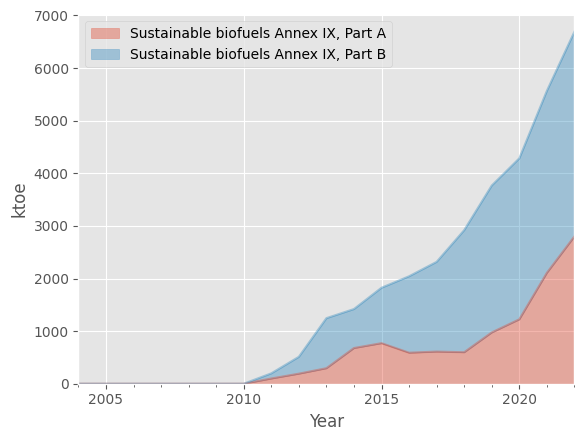

In [36]:
# geo "EU27_2020", "EA20"
dsp = (
    ds.sel(geo="EU27_2020")
    .drop("geo")
    .sel(
        siec_name=[
            "Sustainable biofuels Annex IX, Part A",
            "Sustainable biofuels Annex IX, Part B",
        ]
    )
    .sel(
        nrg_bal_name=[
            "Final consumption - other transport sector- energy use - Renewable Energy Directive",
            "Final consumption - transport sector - energy use - Renewable Energy Directive",
            "Final consumption - transport sector - rail - energy use - Renewable Energy Directive",
            "Final consumption - transport sector - road - energy use - Renewable Energy Directive",
        ]
    )
).sum(dim="nrg_bal_name")
dfp = dsp.to_dataset("siec_name").to_dataframe()

fig, ax = plt.subplots()
dfp.plot(ax=ax, kind="area", alpha=0.4)
ax.set_ylabel("ktoe / year")

In [37]:
ds.geo

<xarray.DataArray 'geo' (geo: 41)> Size: 328B
array(['AL', 'AT', 'BA', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EA20', 'EE',
       'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'GE', 'HR', 'HU', 'IE', 'IS', 'IT',
       'LT', 'LU', 'LV', 'MD', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO',
       'RS', 'SE', 'SI', 'SK', 'TR', 'UK', 'XK'], dtype=object)
Coordinates:
  * geo      (geo) object 328B 'AL' 'AT' 'BA' 'BE' 'BG' ... 'SK' 'TR' 'UK' 'XK'

In [104]:
# geo "EU27_2020", "EA20"
dsp = (
    (
        ds.sel(
            geo=[
                "AL",
                "AT",
                "BA",
                "BE",
                "BG",
                "CY",
                "CZ",
                "DE",
                "DK",
                "EA20",
                "EE",
                "EL",
                "ES",
                "EU27_2020",
                "FI",
                "FR",
                "GE",
                "HR",
                "HU",
                "IE",
                "IS",
                "IT",
                "LT",
                "LU",
                "LV",
                "MD",
                "ME",
                "MK",
                "MT",
                "NL",
                "NO",
                "PL",
                "PT",
                "RO",
                "RS",
                "SE",
                "SI",
                "SK",
                "TR",
                "UK",
                "XK",
            ]
        )
        .sel(
            siec_name=[
                "Sustainable biofuels Annex IX, Part A",
                "Sustainable biofuels Annex IX, Part B",
            ]
        )
        .sum(dim="siec_name")
        .sel(
            nrg_bal_name=[
                "Final consumption - other transport sector- energy use - Renewable Energy Directive",
                "Final consumption - transport sector - energy use - Renewable Energy Directive",
                "Final consumption - transport sector - rail - energy use - Renewable Energy Directive",
                "Final consumption - transport sector - road - energy use - Renewable Energy Directive",
            ]
        )
    )
    .sum(dim="nrg_bal_name")
    .sel(Year="2022")
    .drop_vars("Year")
    .squeeze()
)
dfp = dsp.to_dataframe("value")
dfp = dfp.sort_values("value", ascending=False)
dfp = dfp.drop(["EU27_2020", "EA20", "XK", "EL", "UK"])
dfp.index = [pycountry.countries.get(alpha_2=idx).name for idx in dfp.index]
dfp.head(10)

,value
Italy,1470.477
Spain,1168.942
Germany,1104.446
Sweden,797.034
Netherlands,467.852
France,339.107
Norway,329.687
Portugal,268.306
Ireland,206.488
Hungary,164.100


Text(0.5, 0, 'ktoe')

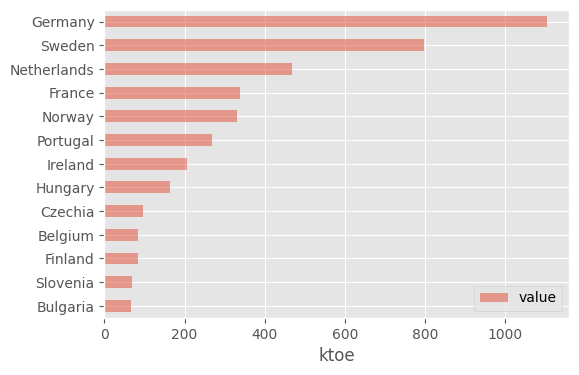

In [108]:
fig, ax = plt.subplots(figsize=(6, 4))
dfp.sort_values("value", ascending=True).iloc[-15:-2].plot(
    kind="barh", ax=ax, alpha=0.5
)
ax.set_xlabel("ktoe")